# Comparing metagenomes

- mg-compare-taxa
- mg-compare-function
- mg-compare-heatmap
- mg-compare-heamap-plot
- mg-biom-merge
- mg-biom2metadata

### Abundance matrix for Refseq

Create a taxonomic abundance matrix for 4 metagenomes for RefSeq annotations. 

mg-compare-taxa.py <br>
--ids "mgm4441679.3,mgm4441680.3,mgm4441681.3,mgm4441682.3" <br>
--level class <br>
--source RefSeq <br>
--format text <br>

In [1]:
! mg-compare-taxa.py --ids "mgm4441679.3,mgm4441680.3,mgm4441681.3,mgm4441682.3" --level class --source RefSeq --format text

	mgm4441679.3	mgm4441680.3	mgm4441681.3	mgm4441682.3
-	5	0	0	19
Actinobacteria (class)	0	5	4	0
Bacilli	5	0	23	2
Betaproteobacteria	1	0	0	0
Chlamydiae (class)	1	0	0	0
Clostridia	55	3	27	9
Deltaproteobacteria	1	1	12	0
Erysipelotrichi	8	1	0	0
Gammaproteobacteria	2	0	38	0
Litostomatea	1	0	0	0
Mollicutes	1	0	2	1
Negativicutes	16	0	0	0
Spirochaetes (class)	0	0	3	0
Synergistia	7	0	0	0
unclassified (derived from Archaea)	0	0	0	2
unclassified (derived from Bacteria)	300	227	318	282
unclassified (derived from Basidiomycota)	0	0	0	1
unclassified (derived from Cyanobacteria)	0	1	0	0
unclassified (derived from Eukaryota)	1	0	1	1
unclassified (derived from Proteobacteria)	0	0	1	0
unclassified (derived from Streptophyta)	1	6	11	0


### Project abundance data on Greengenes and retrieve as biom file.

mg-compare-taxa.py 
--ids "mgm4447943.3,mgm4447192.3,mgm4447102.3,mgm4447103.3" <br>
--level family <br>
--source Greengenes <br>
--format biom > matrix.greengenes.biom

Create abundance matrix and dump into a file in biom format.

In [2]:
! mg-compare-taxa.py --ids "mgm4447943.3,mgm4447192.3,mgm4447102.3,mgm4447103.3" --level family --source Greengenes --format biom > matrix.greengenes.biom

Transform biom to tsv.m

In [9]:
! mg-biom-view.py -i matrix.greengenes.biom --row_end 10

	mgm4447102.3	mgm4447103.3	mgm4447192.3	mgm4447943.3
-	21448	44128	19063	39004
Acetobacteraceae	0	12	0	0
Acholeplasmataceae	4	2	1	11
Acidaminococcaceae	2	24	5	110
Acidithiobacillaceae	0	0	0	2
Acidothermaceae	0	1	0	0
Actinomycetaceae	24741	5109	5926	18896
Aerococcaceae	304	247	162	530
Aeromonadaceae	0	27	4	0
Alcaligenaceae	3	22	4	6


The biom or tsv file can be used for further analysis with R or the command line tools.

### Heatmap from the command line

First create heatmap data and then plot data.

In [18]:
! mg-compare-heatmap.py --help | head -n 5


NAME
    mg-compare-heatmap

VERSION


In [18]:
! mg-compare-heatmap.py --input matrix.greengenes.biom --normalize=1 --output matrix.heatmap

Need R and matR installed. 
>export KB_PERL_PATH=/Users/Andi/Development/MG-RAST-Repo/MG-RAST-Tools/tools/lib/

Plot raw data:

In [5]:
rlib="/Users/Andi/Development/MG-RAST-Repo/MG-RAST-Tools/tools/lib/"

In [23]:
! mg-compare-heatmap-plot.py --input matrix.greengenes.biom --plot myHeatmap --rlib $rlib --format biom

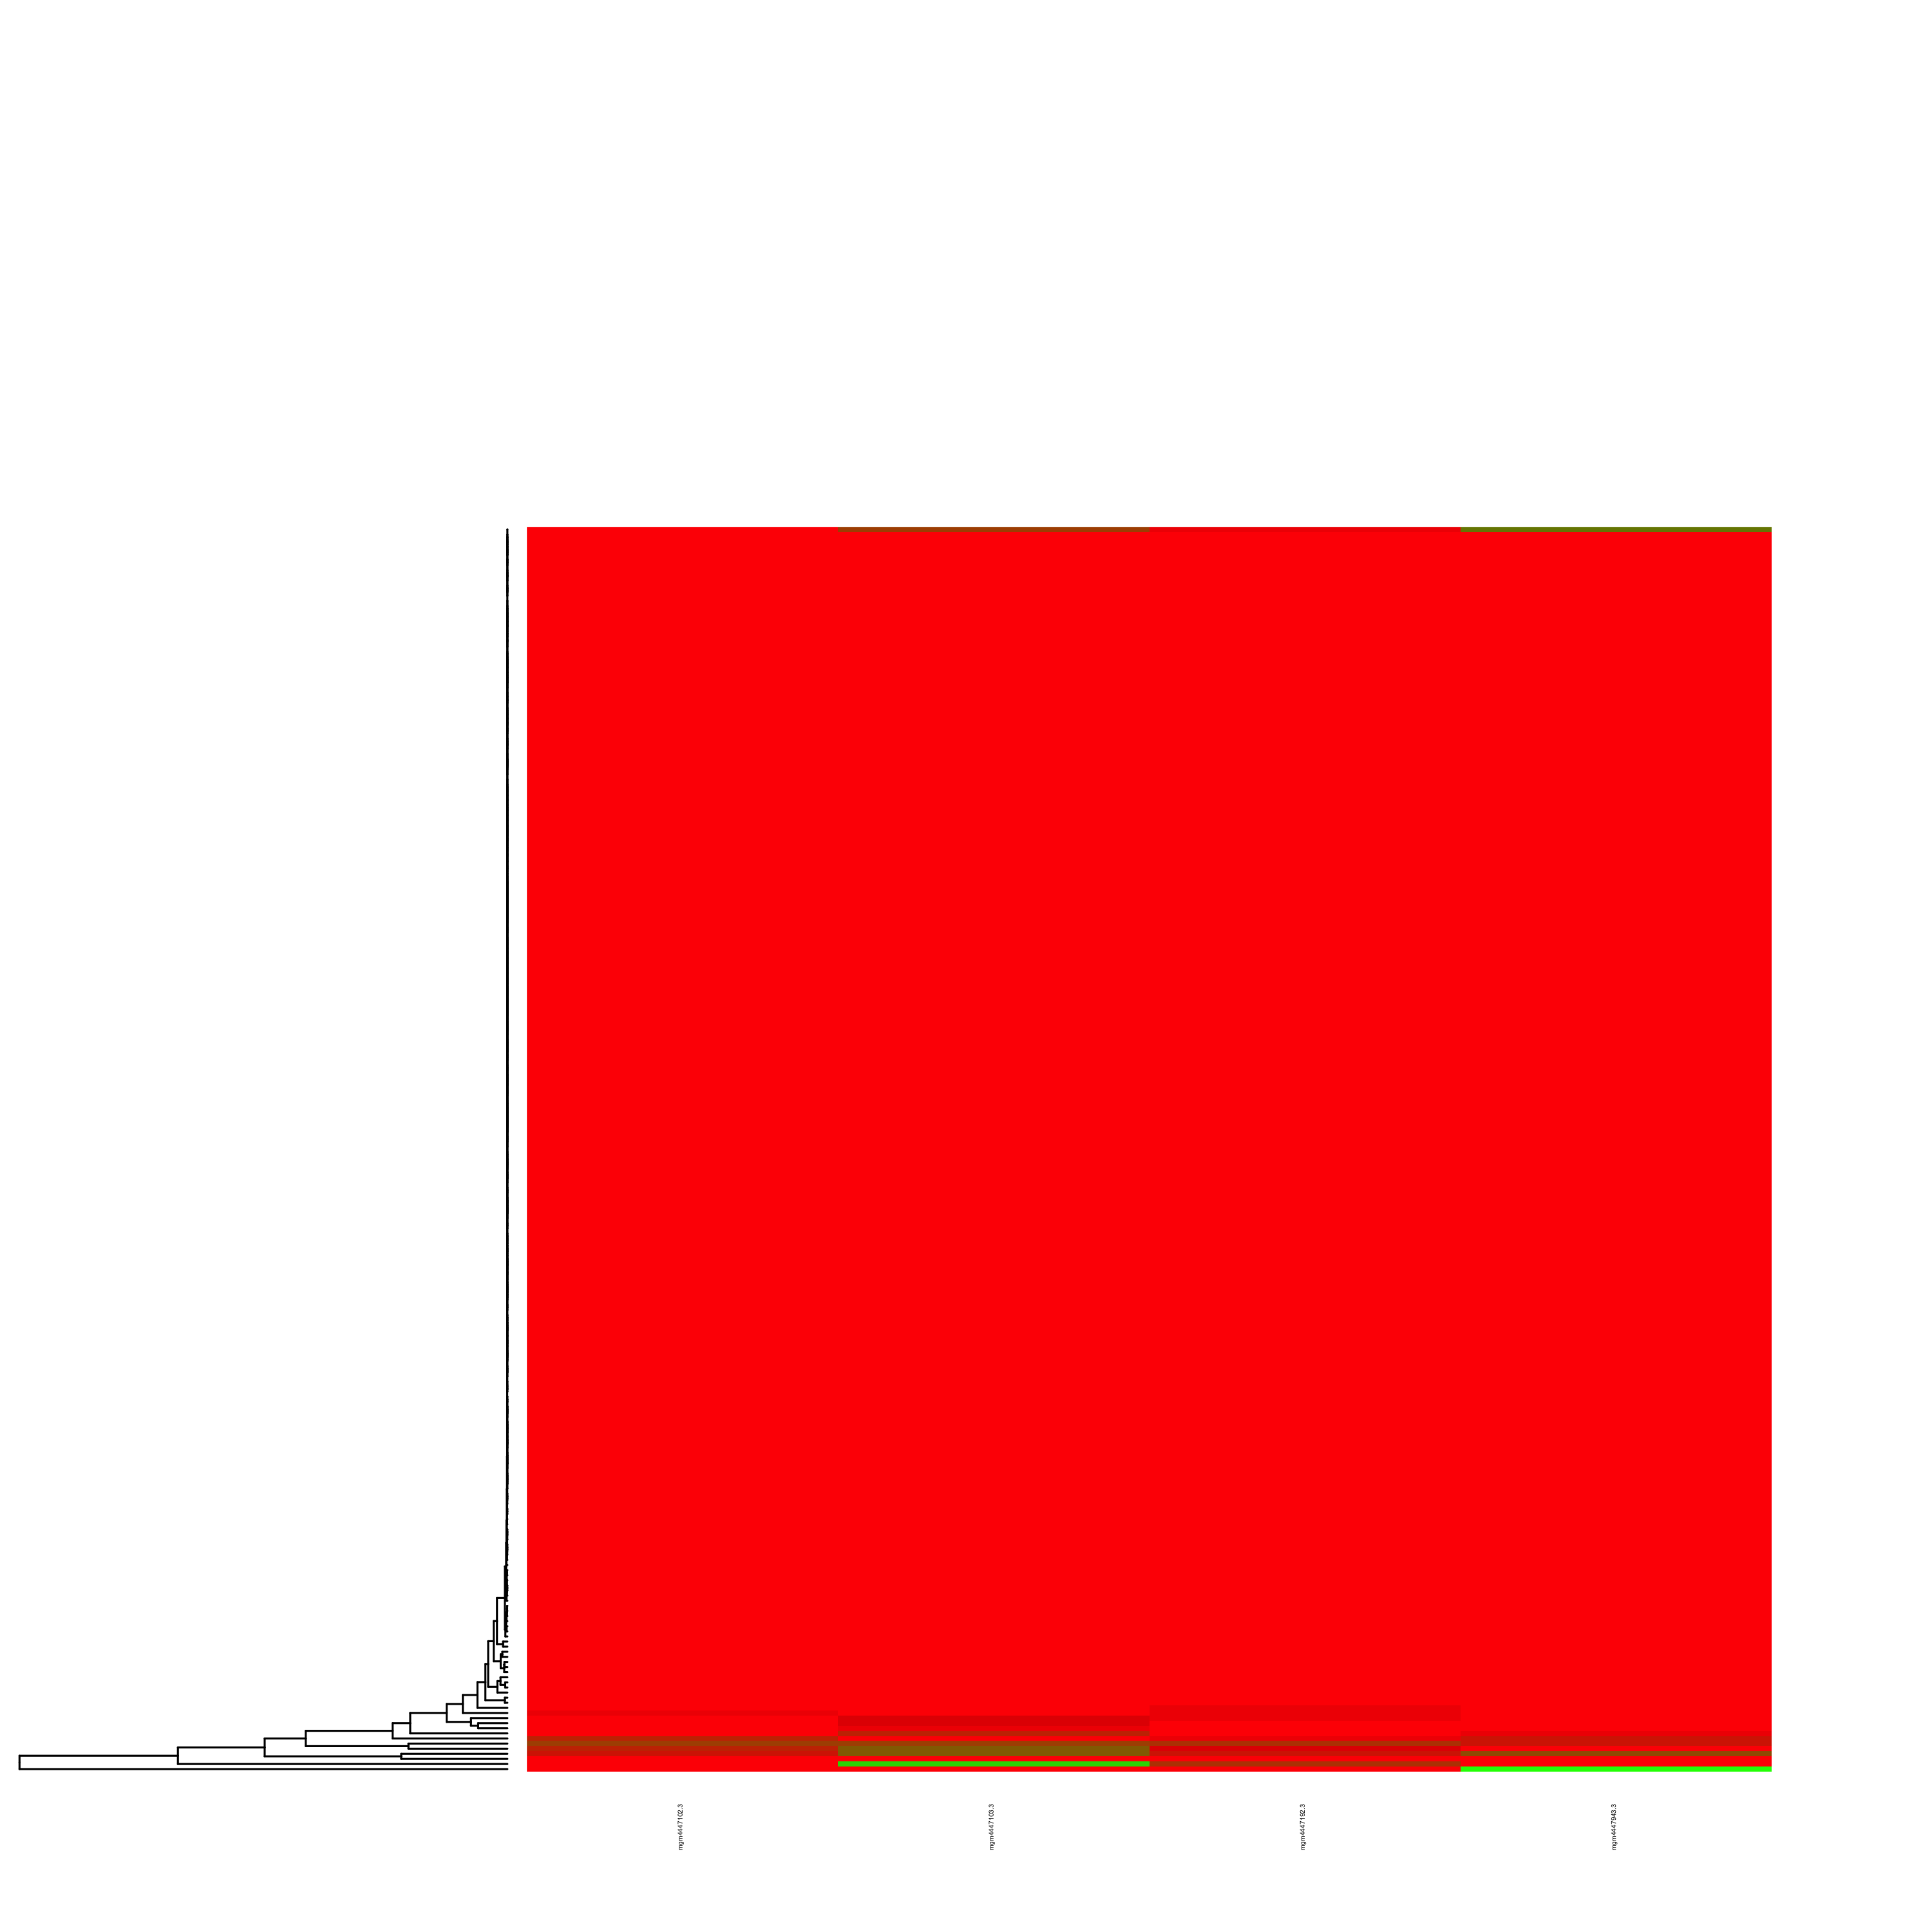

In [36]:
from IPython.display import Image
Image(filename='myHeatmap.png') 

Compute heatmap data:

In [33]:
! mg-compare-heatmap.py --input matrix.greengenes.biom --output test.heatmap --normalize 1 --format biom

Plot normalized heatmap:

In [35]:
! mg-compare-heatmap-plot.py --input test.heatmap --format biom --plot myHeatmap2 --height 5 --width 4 --dpi 200 --rlib=$rlib 

ERROR: input BIOM data not correct format


Display image:

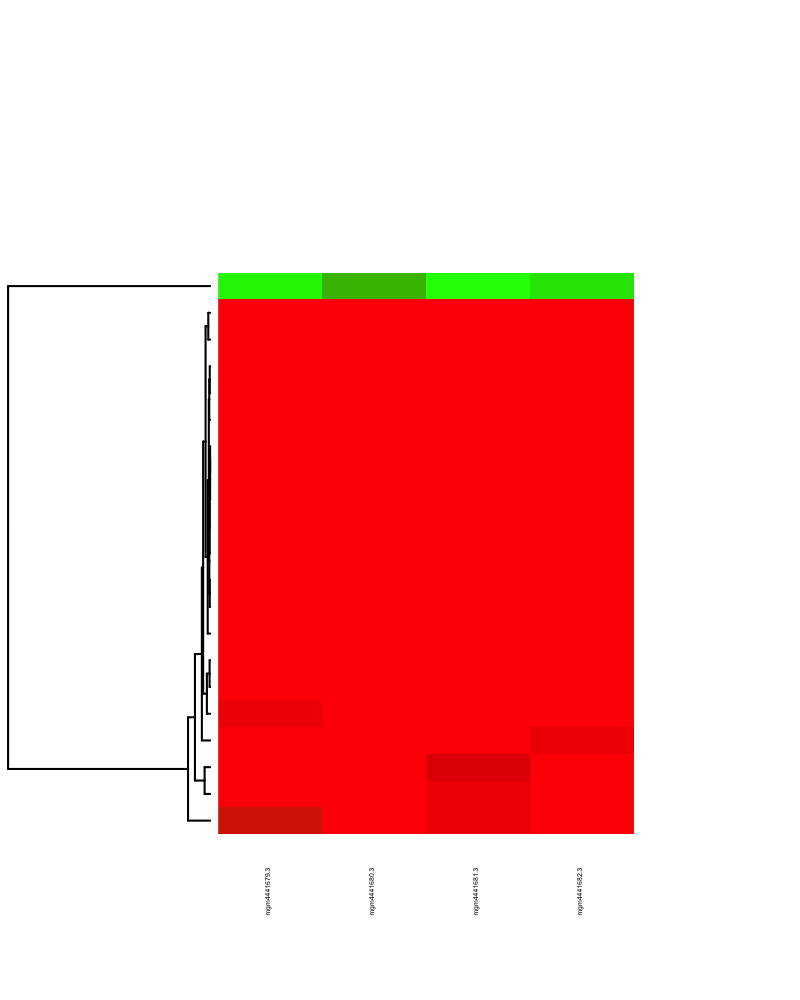

In [26]:
from IPython.display import Image
Image(filename='myHeatmap2.png') 